In [1]:
import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=30, verbose=1, use_multiprocessing=False, validation_data=(x_test, y_test))

Epoch 1/30
1875/1875 [==============================] - 2s 979us/step - loss: 0.3161 - accuracy: 0.9122 - val_loss: 0.1752 - val_accuracy: 0.9481
Epoch 2/30
1875/1875 [==============================] - 2s 885us/step - loss: 0.1544 - accuracy: 0.9549 - val_loss: 0.1346 - val_accuracy: 0.9583
Epoch 3/30
1875/1875 [==============================] - 2s 884us/step - loss: 0.1150 - accuracy: 0.9655 - val_loss: 0.1142 - val_accuracy: 0.9630
Epoch 4/30
1875/1875 [==============================] - 2s 884us/step - loss: 0.0921 - accuracy: 0.9728 - val_loss: 0.1003 - val_accuracy: 0.9679
Epoch 5/30
1875/1875 [==============================] - 2s 921us/step - loss: 0.0764 - accuracy: 0.9768 - val_loss: 0.1084 - val_accuracy: 0.9658
Epoch 6/30
1875/1875 [==============================] - 2s 860us/step - loss: 0.0659 - accuracy: 0.9797 - val_loss: 0.0806 - val_accuracy: 0.9756
Epoch 7/30
1875/1875 [==============================] - 2s 872us/step - loss: 0.0567 - accuracy: 0.9824 - val_loss: 0.0863 -

The idea is that the best weight initilization is one that mirrors the distribution of the 'target' weights.
Since when initializing weights in a NN, we sample a distribution for each weight, we don't need to do multiple final weight samples because each weight is in itself a sample.
Which asks a different question, is there a better way to initialize weights that is not sampling a distribution for each individual weight but for an 'ensemble.'
But what ever!

In [22]:
weightsA = model.layers[1].get_weights()[0].flatten()
weightsB = model.layers[1].get_weights()[1].flatten()
allWeights = np.concatenate([weightsB, weightsA])

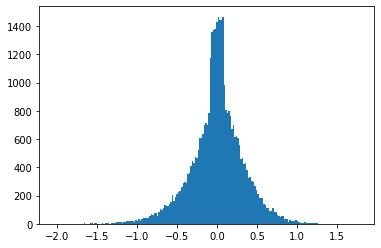

In [27]:
import matplotlib.pyplot as plt
NBINS = 201
plt.hist(allWeights, bins=NBINS)
plt.show()

Looks normal, so I will find STDdev and mean

In [28]:
_stddev = np.std(allWeights)
_mean = np.mean(allWeights)

In [29]:
print("mean: " + str(_mean))
print("stddev: " + str(_stddev))

mean: -0.0013867071
stddev: 0.33228573
